In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('downsampled_data.csv')

In [3]:
# Check dataframe
print (df)

                   Carrier_Name  Month_Day   Week_Day Flight_Date  \
0          Delta Air Lines Inc.          9   Saturday  2023-09-09   
1         United Air Lines Inc.         23  Wednesday  2023-08-23   
2        Southwest Airlines Co.         20   Thursday  2023-04-20   
3              Spirit Air Lines         29     Monday  2023-05-29   
4               JetBlue Airways          5    Tuesday  2023-09-05   
...                         ...        ...        ...         ...   
2745227        Republic Airline         28   Thursday  2024-03-28   
2745228        Republic Airline         28   Thursday  2024-03-28   
2745229        Republic Airline         28   Thursday  2024-03-28   
2745230        Republic Airline         29     Friday  2024-03-29   
2745231        Republic Airline         29     Friday  2024-03-29   

         Airline_DOT_ID Tail_Number  Flight_Number  Origin_Airport_ID  \
0                 19790      N886DN            399              14869   
1                 19977  

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Carrier_Name                     0
Month_Day                        0
Week_Day                         0
Flight_Date                      0
Airline_DOT_ID                   0
Tail_Number                      0
Flight_Number                    0
Origin_Airport_ID                0
Origin_City_Market_ID            0
Origin_IATA_Code                 0
Origin_City_State                0
Destination_Airport_ID           0
Destination_City_Market_ID       0
Destination_IATA_Code            0
Destination_City_State           0
Dep_Time_Block_Group             0
Scheduled_Departure_Time         0
Dep_Delay_At_Least_15_Minutes    0
Scheduled_Arrival_Time           0
Arr_Time_Block_Group             0
Flight_Cancelled                 0
Flight_Diverted                  0
Scheduled_Gate_to_Gate_Time      0
Number_of_Flights                0
Distance_Miles                   0
Distance_Group                   0
dtype: int64


In [5]:
# Handle missing & duplicate values
df = df.drop_duplicates()

In [6]:
# Check columns to identify target variables
df.columns

Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Dep_Delay_At_Least_15_Minutes', 'Scheduled_Arrival_Time',
       'Arr_Time_Block_Group', 'Flight_Cancelled', 'Flight_Diverted',
       'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles',
       'Distance_Group'],
      dtype='object')

In [7]:
# Rename target variables
df.rename(columns={'Dep_Delay_At_Least_15_Minutes':'Delayed', 'Carrier_Name':'Airline'}, inplace=True)

In [8]:
# Inspect columns after rename 
print(df.head(1))

                Airline  Month_Day  Week_Day Flight_Date  Airline_DOT_ID  \
0  Delta Air Lines Inc.          9  Saturday  2023-09-09           19790   

  Tail_Number  Flight_Number  Origin_Airport_ID  Origin_City_Market_ID  \
0      N886DN            399              14869                  34614   

  Origin_IATA_Code  ... Scheduled_Departure_Time  Delayed  \
0              SLC  ...                     2352        0   

   Scheduled_Arrival_Time Arr_Time_Block_Group Flight_Cancelled  \
0                     629        Early Morning                0   

  Flight_Diverted  Scheduled_Gate_to_Gate_Time  Number_of_Flights  \
0               0                          277                  1   

   Distance_Miles Distance_Group  
0            1990              8  

[1 rows x 26 columns]


In [9]:
# Inspect dataframe to identify flights delayed more than 15 min
print(df.head())

                  Airline  Month_Day   Week_Day Flight_Date  Airline_DOT_ID  \
0    Delta Air Lines Inc.          9   Saturday  2023-09-09           19790   
1   United Air Lines Inc.         23  Wednesday  2023-08-23           19977   
2  Southwest Airlines Co.         20   Thursday  2023-04-20           19393   
3        Spirit Air Lines         29     Monday  2023-05-29           20416   
4         JetBlue Airways          5    Tuesday  2023-09-05           20409   

  Tail_Number  Flight_Number  Origin_Airport_ID  Origin_City_Market_ID  \
0      N886DN            399              14869                  34614   
1      N26906            700              12264                  30852   
2      N8776L           2557              13796                  32457   
3      N695NK           3163              13303                  32467   
4      N607JB            182              10693                  30693   

  Origin_IATA_Code  ... Scheduled_Departure_Time  Delayed  \
0              SLC 

In [11]:
# Identify num of delayed flights
num_delayed_flights = df[df['Delayed'] == True].shape[0]
print(f"Number of delayed flights: {num_delayed_flights}")

Number of delayed flights: 1372616


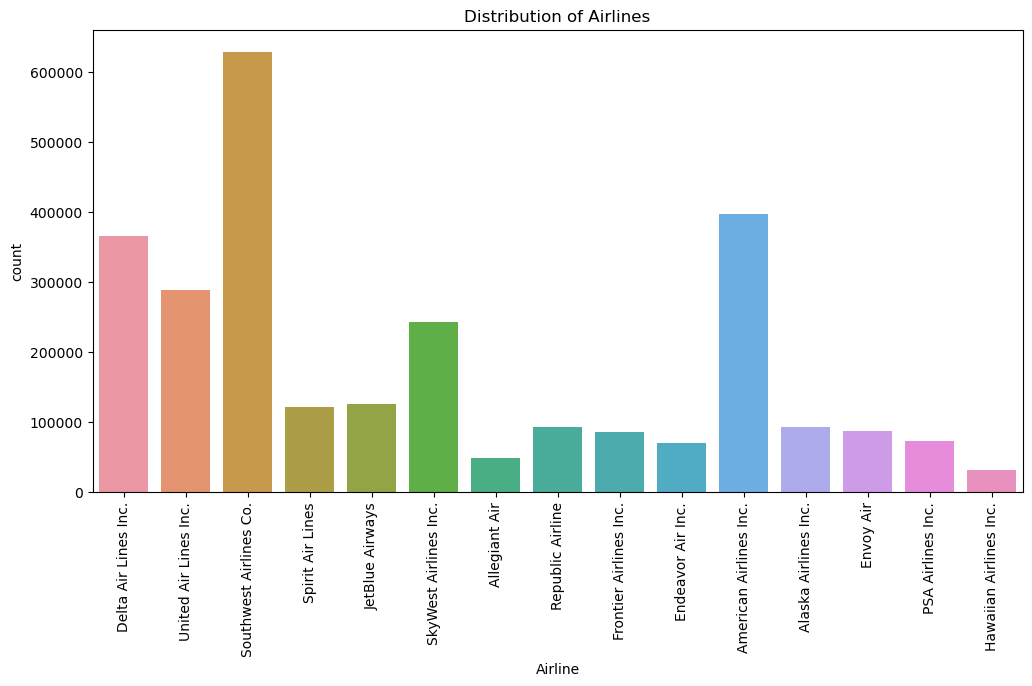

In [12]:
# Step 5: Distribution of Airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline')
plt.title('Distribution of Airlines')
plt.xticks(rotation=90)
plt.show()

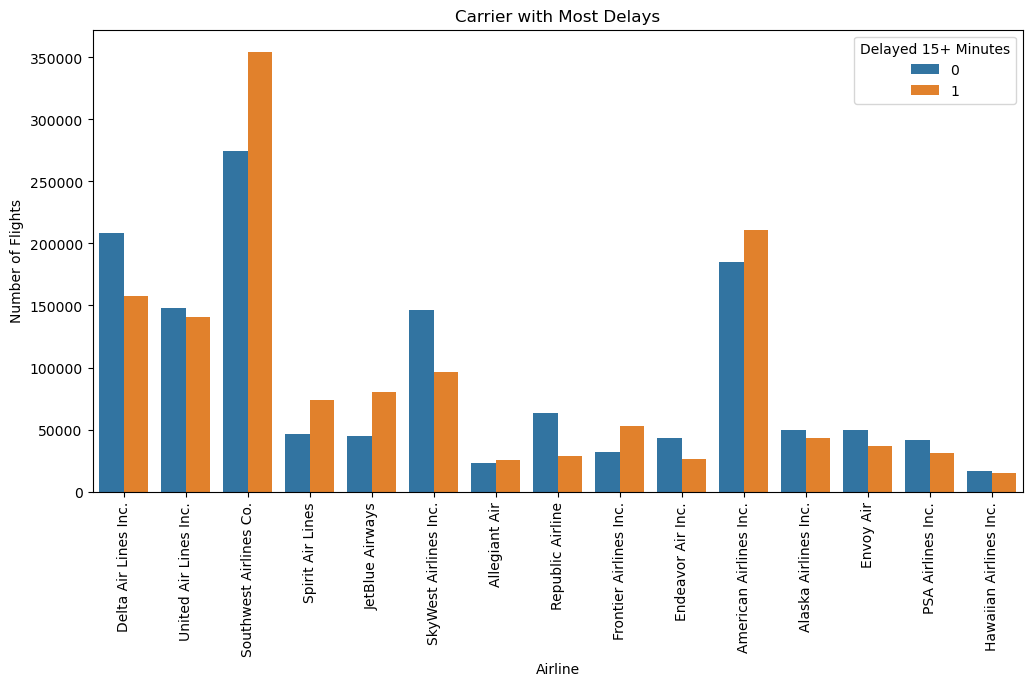

In [13]:
# Airlines with most delays 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', hue='Delayed')
plt.title('Carrier with Most Delays')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.legend(title='Delayed 15+ Minutes')
plt.show()